<a href="https://colab.research.google.com/github/TranMyLinh-297/QA_Law_VN/blob/master/KnowledgeDistillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fx01734trnmlinh","key":"201c2b39bfef0c59c18018a2620c8b57"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                    title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gpreda/covid-world-vaccination-progress                COVID-19 World Vaccination Progress                  41KB  2021-01-31 09:09:49           4559  
ayushggarg/all-trumps-twitter-insults-20152021         All Trump's Twitter insults (2015-2021)             581KB  2021-01-20 16:51:05            905  
sevgisarac/temperature-change                          Temperature change                                  778KB  2020-12-24 20:06:36            981  
jorgesandoval/wind-power-generation                    Wind Power Generation Data                          245KB  2021-01-07 18:45:08            397  
cdminix/us-drought-meteorological-data                 US Drought & Meteorological Data       

In [ ]:
! kaggle competitions download -c "home-credit-default-risk"

 94% 91.0M/96.7M [00:01<00:00, 75.3MB/s]
100% 96.7M/96.7M [00:01<00:00, 83.2MB/s]
 93% 253M/271M [00:02<00:00, 115MB/s] 
100% 271M/271M [00:02<00:00, 108MB/s]
100% 5.81M/5.81M [00:00<00:00, 58.8MB/s]

 85% 65.0M/76.3M [00:00<00:00, 55.7MB/s]
100% 76.3M/76.3M [00:00<00:00, 91.6MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 58.0MB/s]
 76% 28.0M/36.8M [00:00<00:00, 65.8MB/s]
100% 36.8M/36.8M [00:00<00:00, 102MB/s] 
100% 56.8M/56.8M [00:00<00:00, 87.6MB/s]

 90% 98.0M/109M [00:00<00:00, 87.1MB/s]
100% 109M/109M [00:00<00:00, 115MB/s]  
 66% 24.0M/36.1M [00:00<00:00, 57.9MB/s]
100% 36.1M/36.1M [00:00<00:00, 90.0MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 34.8MB/s]


In [ ]:
! unzip /content/application_train.csv.zip

Archive:  /content/application_train.csv.zip
  inflating: application_train.csv   


# Run

In [ ]:
import pickle
import sys
sys.path.insert(0, '../')
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
import pickle
import gc
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../influence_boosting')

import os
import pickle
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_checkpoint = "/content/drive/My Drive/Checkpoint_HomeCredit"
X_train_final = pd.read_csv('%s/X_train_final.csv' %(path_checkpoint))
X_val_final = pd.read_csv('%s/X_val_final.csv' %(path_checkpoint))
X_test_final = pd.read_csv('%s/X_test_final.csv' %(path_checkpoint))
y = np.loadtxt('%s/y.txt' %(path_checkpoint))
y_train = np.loadtxt('%s/y_train.txt' %(path_checkpoint))
y_val = np.loadtxt('%s/y_val.txt' %(path_checkpoint))
y_test = np.loadtxt('%s/y_test.txt' %(path_checkpoint))
distances_final = np.loadtxt('%s/distances_final.txt' %(path_checkpoint))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pickle

In [ ]:
 with open('/content/drive/MyDrive/Checkpoint_HomeCredit/select_features.txt','rb') as fp:
    selected_features = pickle.load(fp)

In [ ]:
train_data = X_train_final[selected_features].to_numpy()
train_targets = (y_train).astype(dtype=np.int64, copy=False)
test_data = X_test_final[selected_features].to_numpy()
test_targets = y_test.astype(dtype=np.int64, copy=False)
val_data = X_val_final[selected_features].to_numpy()
val_targets = y_val.astype(dtype=np.int64, copy=False)

# Mystery 1

In [ ]:
model = dict()
coef = dict()
accuracy_score = dict()
for i in range(10):
    model["{}".format(i)] = LogisticRegression(random_state=i).fit(train_data, train_targets)
    coef["{}".format(i)] =  model["{}".format(i)].coef_[0]
    accuracy_score["{}".format(i)] = model["{}".format(i)].score(test_data, test_targets)

In [ ]:
accuracy_score

{'0': 0.9192663732737876,
 '1': 0.9192663732737876,
 '2': 0.9192663732737876,
 '3': 0.9192663732737876,
 '4': 0.9192663732737876,
 '5': 0.9192663732737876,
 '6': 0.9192663732737876,
 '7': 0.9192663732737876,
 '8': 0.9192663732737876,
 '9': 0.9192663732737876}

In [ ]:
coef["0"] - coef["1"]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

# Mystery 2

# application_train.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("/content/application_train.csv")
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [ ]:
train["TARGET"].unique()

array([1, 0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_checkpoint = "/content/drive/My Drive/Checkpoint_HomeCredit"
X_train_final = pd.read_csv('%s/X_train_final.csv' %(path_checkpoint))
X_val_final = pd.read_csv('%s/X_val_final.csv' %(path_checkpoint))
X_test_final = pd.read_csv('%s/X_test_final.csv' %(path_checkpoint))
y = np.loadtxt('%s/y.txt' %(path_checkpoint))
y_train = np.loadtxt('%s/y_train.txt' %(path_checkpoint))
y_val = np.loadtxt('%s/y_val.txt' %(path_checkpoint))
y_test = np.loadtxt('%s/y_test.txt' %(path_checkpoint))
distances_final = np.loadtxt('%s/distances_final.txt' %(path_checkpoint))

In [ ]:
X_train_final

,Unnamed: 0,Unnamed: 0.1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_MISSING,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_MISSING,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_MISSING,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_MISSING,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,0,2.199401,0.860238,3.406598,2.854094,3.413521,-1.012947,0.561130,-0.458925,-0.699293,0.777712,0.419415,0.002155,0.468667,-0.498545,0.043255,-0.624178,-0.245658,2.032678,1.860622,1.925038,-0.325239,-0.123968,-0.232453,-0.207322,-0.290087,-0.546901,-0.468468,1.229362,-0.978373,0.728888,0.263456,0.307705,0.105023,0.428028,-0.165020,-0.368629,1.377599,-0.280264,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,-0.579651,0.614108,-0.225808,0.758067,-0.227995,-0.765357,-0.345889,-0.460199,0.266430,1.263692,-0.146282,0.002155,0.468667,-0.498545,0.043255,-0.624178,-0.245658,-0.167865,-0.103172,-0.062729,-0.325239,-0.123968,-0.232453,-0.207322,-0.290087,-0.546901,-0.468468,0.011554,0.541469,-0.432986,-0.190204,-0.094755,0.047449,0.012975,-0.165020,-0.368629,-0.083786,-0.280264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2,0.809875,-0.206328,-1.215134,-0.965581,-1.214493,-1.140791,1.026562,-0.455845,-0.158874,-0.751830,-0.146282,0.002155,0.468667,-0.498545,0.043255,1.602108,4.070696,0.932407,-0.103172,-0.062729,-0.325239,-0.123968,-0.232453,-0.207322,-0.290087,-0.546901,-0.468468,-1.043575,0.698172,0.112085,-0.190204,-0.094755,0.047449,0.012975,-0.165020,-0.368629,-0.083786,-0.280264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,3,2.199401,-0.468867,-1.323821,-1.621885,-1.336283,0.756985,0.065204,-0.489703,-0.082602,-1.520911,-0.146282,0.002155,0.468667,-0.498545,0.043255,-0.624178,-0.245658,2.032678,-0.103172,-0.062729,0.287456,-0.123968,-0.232453,-0.207322,-0.290087,-0.546901,-0.468468,-0.846247,0.457493,-0.382013,-0.190204,-0.094755,0.047449,0.012975,-0.165020,-0.368629,-0.083786,-0.280264,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1

In [ ]:
import pickle
import sys
sys.path.insert(0, '../')
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
import pickle
import gc
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../influence_boosting')

import os
import pickle


In [ ]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    
    # Precision matrix
    B = (C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = ['Re-paid(0)','Not Re-paid(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    
    plt.show()
def cv_plot(alpha, cv_auc):
    
    fig, ax = plt.subplots()
    ax.plot(np.log10(alpha), cv_auc,c='g')
    for i, txt in enumerate(np.round(cv_auc,3)):
        ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_auc[i]))
    plt.grid()
    plt.xticks(np.log10(alpha))
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

In [ ]:
 with open('/content/drive/MyDrive/Checkpoint_HomeCredit/select_features.txt','rb') as fp:
    selected_features = pickle.load(fp)

In [ ]:
model_sk = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000, 
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1)
train_features, valid_features, train_y, valid_y = train_test_split(X_train_final, y_train, test_size = 0.15, random_state = 42)
model_sk.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.755014	valid_0's binary_logloss: 0.592279
[400]	valid_0's auc: 0.769241	valid_0's binary_logloss: 0.565982
[600]	valid_0's auc: 0.775226	valid_0's binary_logloss: 0.551578
[800]	valid_0's auc: 0.777785	valid_0's binary_logloss: 0.541902
[1000]	valid_0's auc: 0.779179	valid_0's binary_logloss: 0.534451
[1200]	valid_0's auc: 0.779853	valid_0's binary_logloss: 0.52798
[1400]	valid_0's auc: 0.780196	valid_0's binary_logloss: 0.522396
Early stopping, best iteration is:
[1388]	valid_0's auc: 0.780222	valid_0's binary_logloss: 0.522698


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.8, importance_type='split',
               learning_rate=0.01, max_depth=7, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
cd /content/drive/MyDrive/Checkpoint_HomeCredit

/content/drive/MyDrive/Checkpoint_HomeCredit


In [ ]:
feature_imp = pd.DataFrame(sorted(zip(model_sk.feature_importances_, X_train_final.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)
selected_features = list(features_df[features_df['Value']>=50]['Feature'])
# Saving the selected features into pickle file
with open('select_features.txt','wb') as fp:
    pickle.dump(selected_features, fp)
print('The no. of features selected:',len(selected_features))

The no. of features selected: 192


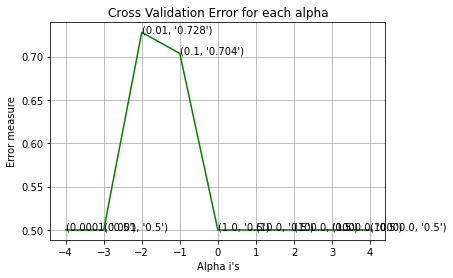

The Optimal C value is: 0.01


In [ ]:
alpha = np.logspace(-4,4,9)
cv_auc_score = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1',class_weight = 'balanced', loss='log', random_state=28)
    clf.fit(X_train_final[selected_features], y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train_final[selected_features], y_train)
    y_pred_prob = sig_clf.predict_proba(X_val_final[selected_features])[:,1]
    cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
    print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
cv_plot(alpha, cv_auc_score)
print('The Optimal C value is:', alpha[np.argmax(cv_auc_score)])


For best alpha 0.01, The Train AUC score is 0.7274460448969935
For best alpha 0.01, The Cross validated AUC score is 0.7280577674304249
For best alpha 0.01, The Test AUC score is 0.7285774599019743
The test AUC score is : 0.7285774599019743
The percentage of misclassified points 08.65% :


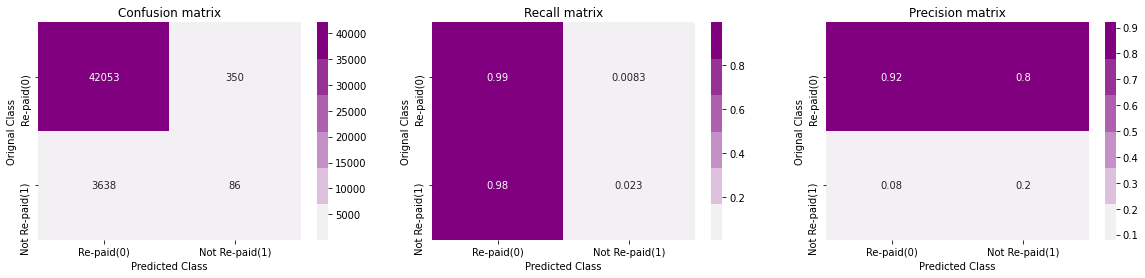

In [ ]:
best_alpha = alpha[np.argmax(cv_auc_score)]
logreg = SGDClassifier(alpha = best_alpha, class_weight = 'balanced', penalty = 'l1', loss='log', random_state = 28)
logreg.fit(X_train_final[selected_features], y_train)
logreg_sig_clf = CalibratedClassifierCV(logreg, method='sigmoid')
logreg_sig_clf.fit(X_train_final[selected_features], y_train)
y_pred_prob = logreg_sig_clf.predict_proba(X_train_final[selected_features])[:,1]
print('For best alpha {0}, The Train AUC score is {1}'.format(best_alpha, roc_auc_score(y_train,y_pred_prob) ))    
y_pred_prob = logreg_sig_clf.predict_proba(X_val_final[selected_features])[:,1]
print('For best alpha {0}, The Cross validated AUC score is {1}'.format(best_alpha, roc_auc_score(y_val,y_pred_prob) ))  
y_pred_prob = logreg_sig_clf.predict_proba(X_test_final[selected_features])[:,1]
print('For best alpha {0}, The Test AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob) ))
y_pred = logreg.predict(X_test_final[selected_features])
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)
